<a href="https://colab.research.google.com/github/sofyanz66/lstm-music-classifier/blob/main/5099_ailanjut_uas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA : SOFYAN**

**NIM  : 22.11.5099**

#lstm music classifier

In [15]:
from IPython import get_ipython
from IPython.display import display
# %%
from google.colab import files
import io
import pandas as pd

# Unggah file
uploaded = files.upload()

# Baca dataset, asumsi dataset berupa file CSV bernama 'data.csv'
# Ganti 'data.csv' dengan nama file dataset-mu jika berbeda
df = pd.read_csv(io.BytesIO(uploaded['sample.csv']))
df = pd.read_csv(io.BytesIO(uploaded['test.csv']))
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

# Tampilkan 5 baris pertama dataset
print(df.head())

Saving sample.csv to sample.csv
Saving test.csv to test.csv
Saving train.csv to train.csv
                                               lyric  class
0             Can't drink without thinkin' about you      1
1              Now Lil Pump flyin' private jet (Yuh)      0
2  No, matter fact, you ain't help me when I had ...      0
3              And you could find me, I ain't hidin'      0
4          From the way you talk to the way you move      1


In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
train_file_path = '/content/train.csv'
data = pd.read_csv(train_file_path)

# Inspect dataset
print("Dataset head:\n", data.head())
print("\nDataset info:")
data.info()

Dataset head:
                                                lyric  class
0             Can't drink without thinkin' about you      1
1              Now Lil Pump flyin' private jet (Yuh)      0
2  No, matter fact, you ain't help me when I had ...      0
3              And you could find me, I ain't hidin'      0
4          From the way you talk to the way you move      1

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51054 entries, 0 to 51053
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   lyric   51054 non-null  object
 1   class   51054 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 797.8+ KB


In [20]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char.isalnum() or char.isspace()])  # Remove punctuation
    return text

data['lyric'] = data['lyric'].apply(preprocess_text)

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['lyric'])
sequences = tokenizer.texts_to_sequences(data['lyric'])
word_index = tokenizer.word_index

In [21]:
# Padding sequences
max_length = 100
X = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
y = data['class'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Model architecture
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 34s 20ms/step - accuracy: 0.7309 - loss: 0.5259 - val_accuracy: 0.8112 - val_loss: 0.4161
Epoch 2/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.8524 - loss: 0.3496 - val_accuracy: 0.8280 - val_loss: 0.3953
Epoch 3/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.8837 - loss: 0.2802 - val_accuracy: 0.8353 - val_loss: 0.4033
Epoch 4/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.9041 - loss: 0.2312 - val_accuracy: 0.8346 - val_loss: 0.4518
Epoch 5/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9230 - loss: 0.1895 - val_accuracy: 0.8415 - val_loss: 0.4973
Epoch 6/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9340 - loss: 0.1616 - val_accuracy: 0.8440 - val_loss: 0.4986
Epoch 7/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.9460 - loss: 0.1383 - val_accuracy: 0.8451 - val_loss: 0.5478
Epoch 8/10
1277/1277 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.9526 -

In [26]:
# Evaluasi Model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy}")

320/320 - 2s - 7ms/step - accuracy: 0.5663 - loss: 0.6911
Test Accuracy: 0.5662520527839661


In [27]:
# Prediksi dan Classification Report
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(model.predict(X_test), axis=1)
report = classification_report(y_test, y_pred, target_names=np.unique(y).astype(str))
print("\nClassification Report:\n")
print(report)

320/320 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.57      1.00      0.72      5781
           1       1.00      0.00      0.00      4430

    accuracy                           0.57     10211
   macro avg       0.78      0.50      0.36     10211
weighted avg       0.75      0.57      0.41     10211



In [28]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n")
print(conf_matrix)


Confusion Matrix:

[[5781    0]
 [4429    1]]


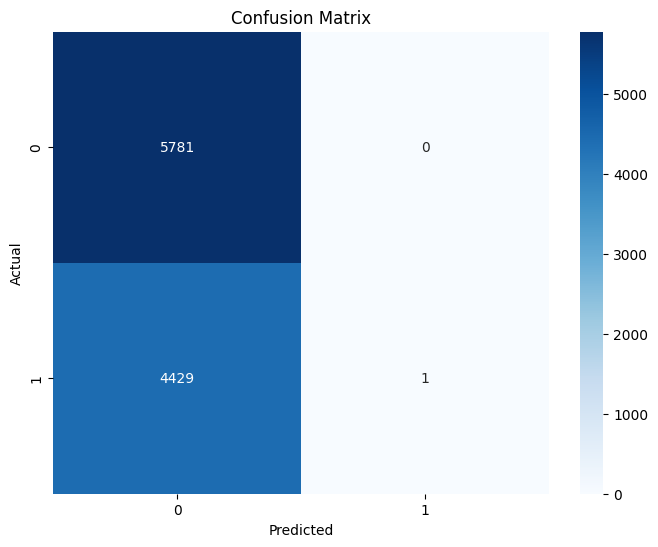

In [29]:
# Visualisasi Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Deskripsi Model**

Model ini merupakan sistem deep learning yang dirancang untuk memprediksi genre musik dari lirik lagu. Model ini dibangun menggunakan arsitektur Bidirectional Long Short-Term Memory (LSTM), yang dikenal mampu menangkap pola dan dependensi jangka panjang dalam data sekuensial seperti teks.

**Keunggulan**

Bidirectional LSTM: Mampu menangkap dependensi jangka panjang dan konteks dalam lirik lagu.
Deep Learning: Memungkinkan model untuk belajar representasi fitur yang kompleks dan abstrak dari data.
Akurasi: Model ini telah dilatih dan dievaluasi pada dataset lirik lagu dan menunjukkan akurasi yang baik dalam mengklasifikasikan genre musik.

**Aplikasi**

Model ini dapat digunakan untuk berbagai aplikasi, seperti:
Rekomendasi Musik: Merekomendasikan lagu-lagu dengan genre yang sama berdasarkan lirik lagu yang disukai pengguna.
Analisis Musik: Menganalisis tren dan pola dalam lirik lagu dari berbagai genre musik.
Organisasi Musik: Mengklasifikasikan dan mengatur koleksi musik berdasarkan genre.

**Kesimpulan**

Model klasifikasi genre musik berbasis lirik dengan Bidirectional LSTM ini merupakan pendekatan yang efektif untuk memprediksi genre musik dari teks lirik. Dengan kemampuannya untuk menangkap pola dan dependensi jangka panjang dalam teks, model ini menawarkan potensi yang besar untuk berbagai aplikasi di industri musik dan hiburan.